In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import pandas as pd
import math
import time
from sklearn.neighbors import KNeighborsClassifier
dataset=np.load("./data.npy",allow_pickle=True)

2.2.1 Task 1 [10]
Draw a graph that shows the distribution of the various labels across the entire
dataset. You are allowed to use standard libraries like Matplotlib.

In [2]:
# Extract the label column (assuming it's the fourth column, index 3)
labels = dataset[:, 3]

# Count the frequency of each label
label_counts = np.unique(labels, return_counts=True)

# Extract label names and their corresponding frequencies
label_names = label_counts[0]
label_frequencies = label_counts[1]

length=len(label_names)


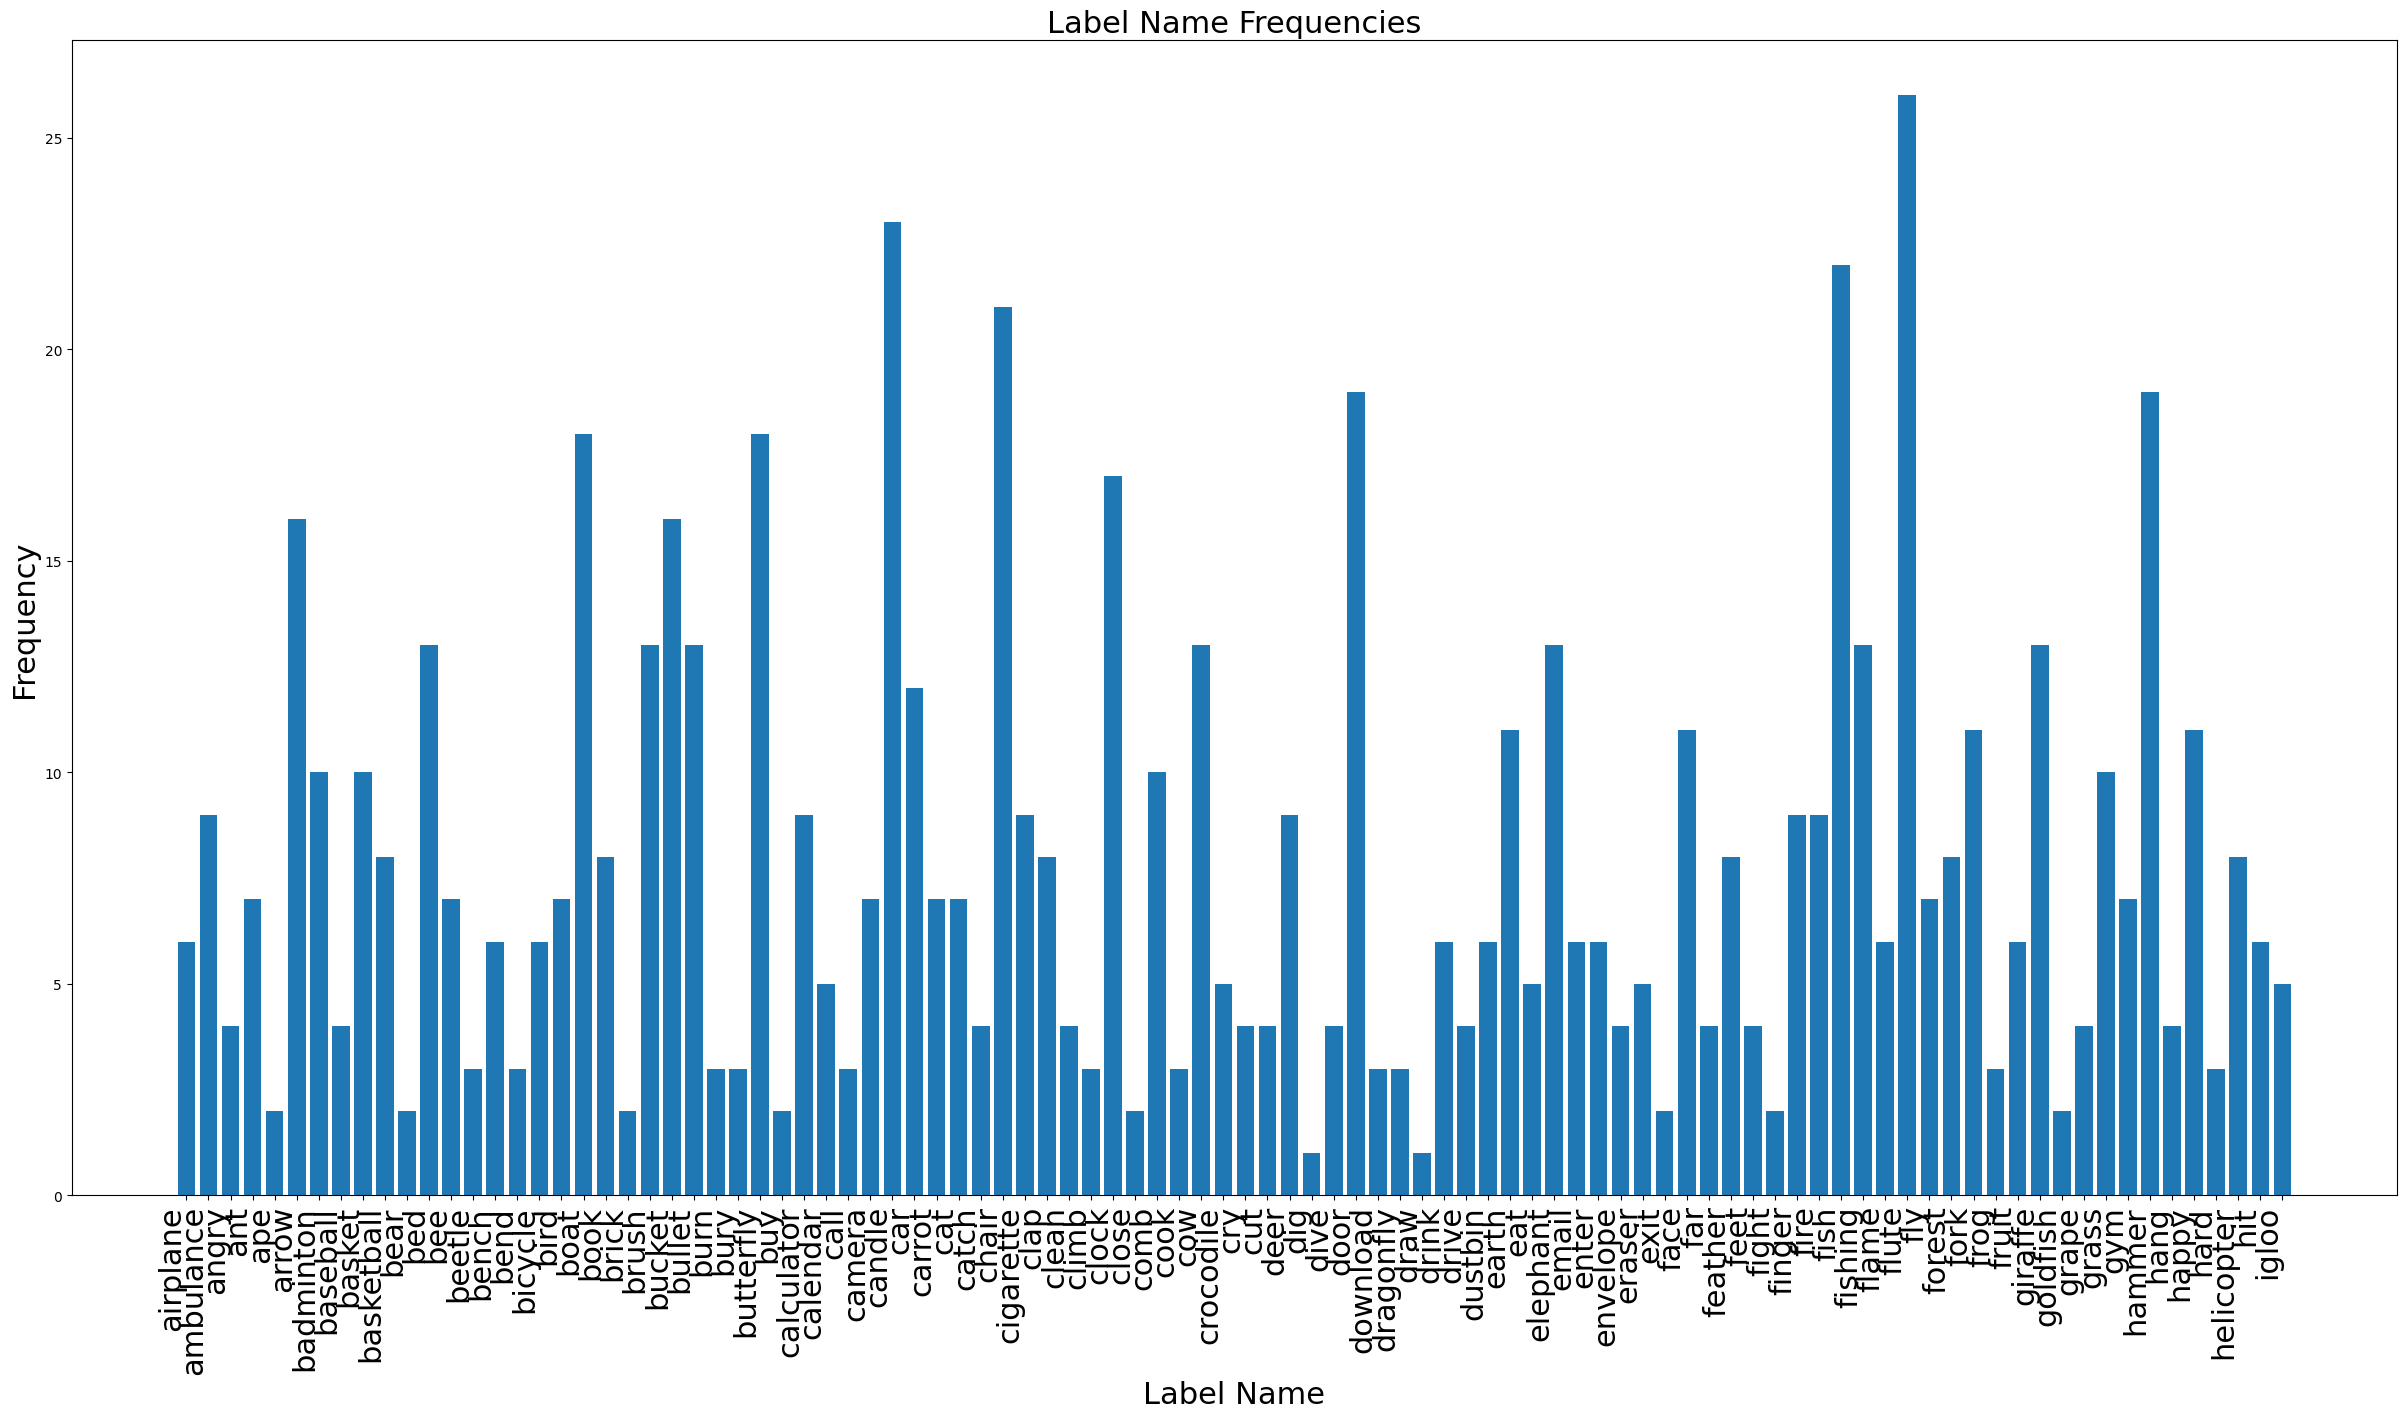

In [3]:
# Create a bar graph
plt.figure(figsize=(30,15))
plt.bar(label_names[:length//2], label_frequencies[:length//2])
plt.xlabel('Label Name',fontsize=22)
plt.ylabel('Frequency',fontsize=22)
plt.title('Label Name Frequencies',fontsize=22)
plt.xticks(rotation=90, ha="right",fontsize=22)

# Display the graph
plt.show()

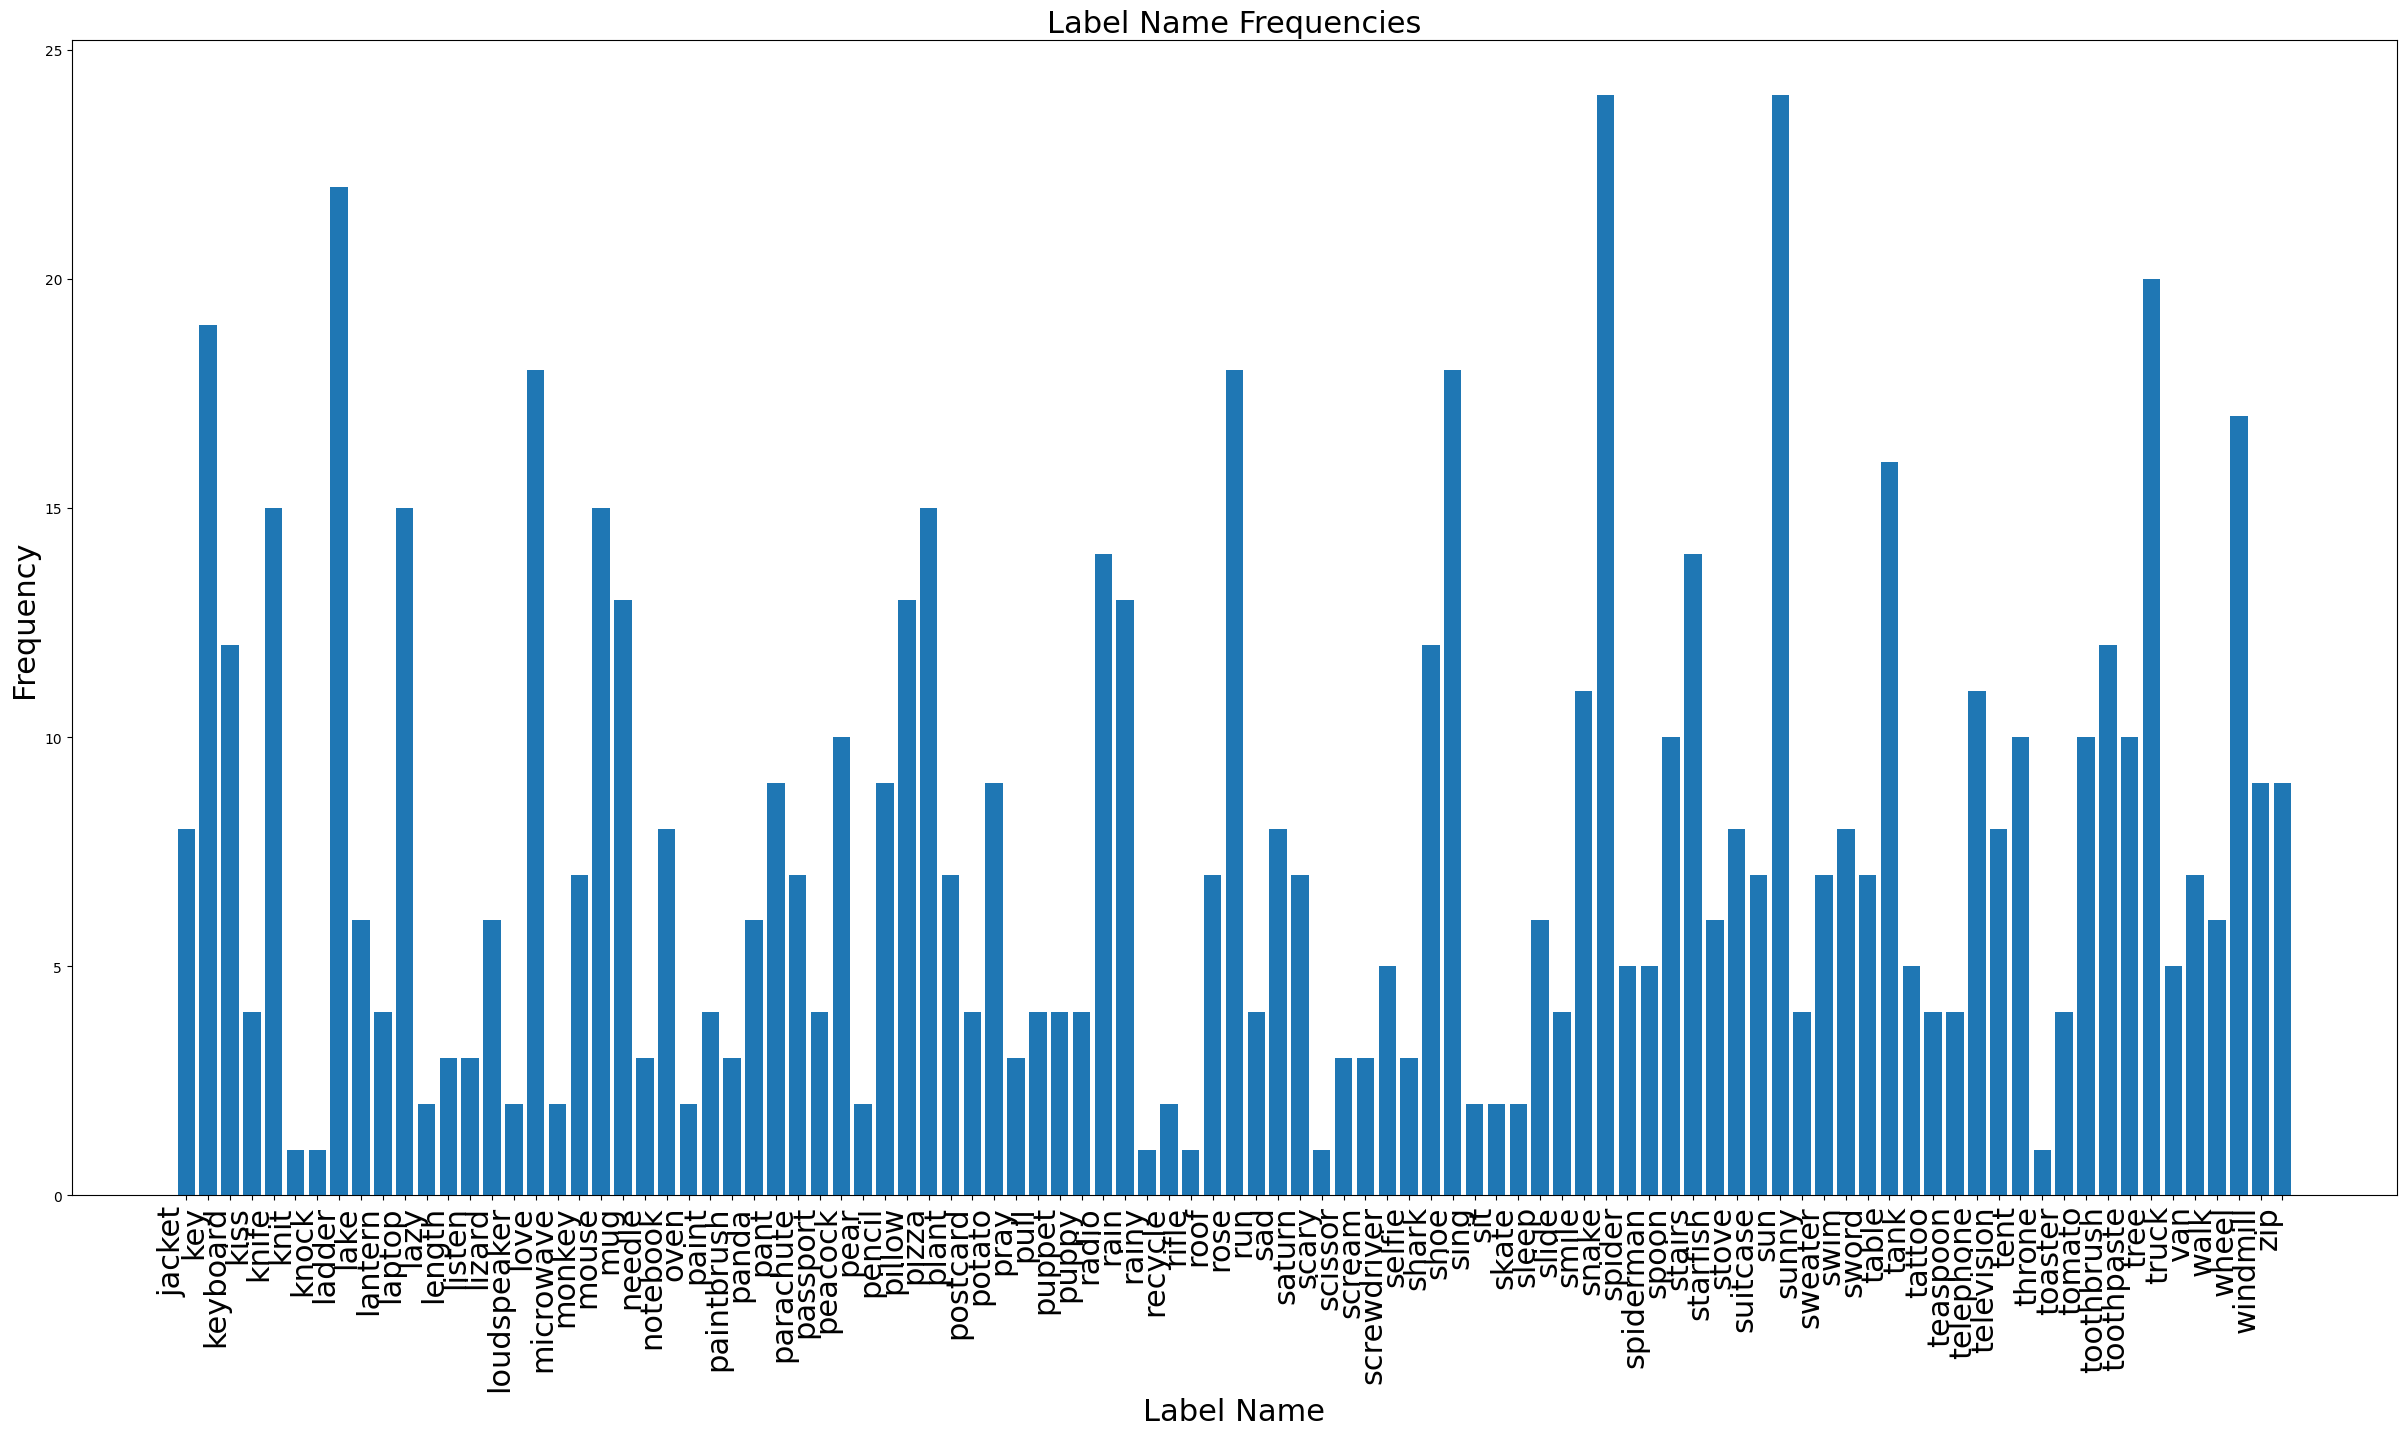

In [4]:
# Create a bar graph
plt.figure(figsize=(30,15))
plt.bar(label_names[length//2:], label_frequencies[length//2:])
plt.xlabel('Label Name',fontsize=22)
plt.ylabel('Frequency',fontsize=22)
plt.title('Label Name Frequencies',fontsize=22)
plt.xticks(rotation=90, ha="right",fontsize=22)

# Display the graph
plt.show()

2.3.1 Task 1 [30]
Create a KNN class where you implement the following: You should
not use sklearn for this.
1. Create a class where you can modify and access the encoder type, k, and
distance metric (and any required parameter)of the class
2. Return the inference (prediction) when given the above parameters (encoder type, k, and distance metric).
3. Return the validation f-1 score, accuracy, precision, and recall after splitting the provided dataset into train and val subsets. You are allowed to
use sklearn metrics for this part.

In [5]:
x_resnet=dataset[:,1]
x_vit=dataset[:,2]
y=dataset[:,3]

In [6]:
class KNN:
    def __init__(self,encoder,distance_metric,k):
        self.encoder=encoder
        self.distance_metric=distance_metric
        self.k=k
        self.y=y
        
    def set_encoder(self,encoder):
        self.encoder=encoder
        if(self.encoder=="VIT"):
            self.x=x_vit
        elif(self.encoder=="ResNet"):
            self.x=x_resnet
    
    def set_k(self,k):
        self.k=k
    def set_distance_metric(self,distance_metric):
        self.distance_metric=distance_metric

    def euclidean_distance(self,v1,v2):
        # print(v1.shape)
        # print(v2.shape)
        return np.linalg.norm(v1 - v2)
    def euclidean_distance_unoptimised(self,v1,v2):
        distance = 0
        v1 = v1.reshape(-1)
        v2 = v2.reshape(-1)
        for i in range(len(v1)):
            distance += (v1[i] - v2[i]) ** 2
            # print(distance)
        return math.sqrt(distance)
    def manhattan_distance(self,v1,v2):
        return np.sum(np.abs(v1 - v2))
    def cosine_distance(self,v1,v2):
        v1 = v1.reshape(-1)
        v2 = v2.reshape(-1)
        dot_product = np.dot(v1, v2)
        norm1 = np.linalg.norm(v1)
        norm2 = np.linalg.norm(v2)
        similarity = dot_product / (norm1 * norm2)
        return 1 - similarity  # Convert similarity to distance


    def predict (self,v):
        distances = []

        for data_point, label in zip(self.data, self.labels):
            if self.distance_metric == 'Euclidean':
                dist = self.euclidean_distance(v, data_point)
            elif self.distance_metric == 'Euclidean_unoptimised':
                dist = self.euclidean_distance_unoptimised(v, data_point)
            elif self.distance_metric == 'Manhattan':
                dist = self.manhattan_distance(v, data_point)
            elif self.distance_metric == 'Cosine':
                dist = self.cosine_distance(v, data_point)
            else:
                raise ValueError("Invalid distance metric")

            distances.append((dist, label))

        # if self.distance_metric == 'Euclidean_unoptimised':
        #     for i in range(len(distances)):
        #         if(distances[i][0]>max):
        # print(distances)
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:self.k]

        neighbor_labels = [neighbor[1] for neighbor in neighbors]
        most_common_label = max(set(neighbor_labels), key=neighbor_labels.count)
        

        return most_common_label
        # return "apple"
    
    def split(self):
        x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=0.1, random_state=42)
        self.x_train=x_train
        self.x_test=x_test
        self.y_train=y_train
        self.y_test=y_test
        self.data=self.x_train
        self.labels=self.y_train
    
    def predict_all(self):
        predicted_labels=[]
        true_labels=[]
        # correct = 0
        for i in range(len(self.x_test)):
            predicted_labels.append(self.predict(self.x_test[i]))
            true_labels.append(self.y_test[i])

        self.f1 = f1_score(true_labels, predicted_labels, average='weighted')
        self.accuracy = accuracy_score(true_labels, predicted_labels)
        self.precision = precision_score(true_labels, predicted_labels, average='weighted',zero_division=1)
        self.recall = recall_score(true_labels, predicted_labels, average='weighted',zero_division=1)
    

In [7]:
encoder_type_list=["VIT","ResNet"]
distance_metric_list=["Euclidean","Manhattan","Cosine"]
k_value=4

knn=KNN(k=k_value,encoder=encoder_type_list[0],distance_metric=distance_metric_list[0])
knn.set_encoder(encoder_type_list[0])
knn.split()
knn.predict_all()

print("Accuracy:",knn.accuracy)
print("Precision:",knn.precision)
print("Recall:",knn.recall)
print("F1-score:",knn.f1)

Accuracy: 0.21333333333333335
Precision: 0.6586495726495726
Recall: 0.21333333333333335
F1-score: 0.21164285714285716


2.4.1 Task 2 [30]
Tasks:
1. Find the best (k, encoder, distance metric) triplet that gives the best
validation accuracy for a given data split (your choice).
2. Print an Ordered rank list of top 20 such triplets.
3. Plot k vs accuracy given a choice(yours) of any given distance, encoder
pair (with a constant data split).

In [8]:
max_k=int(math.sqrt(len(y)))
print(max_k)
results=[]

for k_val in range (1,max_k+1):
    for encoder in encoder_type_list:
        for dist in distance_metric_list:
            print(k_val)
            knn.set_encoder(encoder)
            knn.set_distance_metric(dist)
            knn.set_k(k_val)
            knn.predict_all()
            accuracy = knn.accuracy
            results.append((encoder, dist, k_val, accuracy))


38
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
29
29
29
29
29
29
30
30
30
30
30
30
31
31
31
31
31
31
32
32
32
32
32
32
33
33
33
33
33
33
34
34
34
34
34
34
35
35
35
35
35
35
36
36
36
36
36
36
37
37
37
37
37
37
38
38
38
38
38
38


In [9]:
# Sort the results based on accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[3], reverse=True)

# Print the top 3 performing hyperparameter combinations
print("Top 20 Performing Hyperparameter Combinations:")
for idx, (encoder, dist, k, accuracy) in enumerate(sorted_results[:20], start=1):
    print(f"{idx}. Encoder: {encoder}, Distance Metric: {dist}, K: {k}, Accuracy: {accuracy:.4f}")

Top 20 Performing Hyperparameter Combinations:
1. Encoder: VIT, Distance Metric: Manhattan, K: 4, Accuracy: 0.2600
2. Encoder: ResNet, Distance Metric: Manhattan, K: 4, Accuracy: 0.2600
3. Encoder: VIT, Distance Metric: Manhattan, K: 3, Accuracy: 0.2533
4. Encoder: ResNet, Distance Metric: Manhattan, K: 3, Accuracy: 0.2533
5. Encoder: VIT, Distance Metric: Cosine, K: 6, Accuracy: 0.2467
6. Encoder: ResNet, Distance Metric: Cosine, K: 6, Accuracy: 0.2467
7. Encoder: VIT, Distance Metric: Cosine, K: 7, Accuracy: 0.2467
8. Encoder: ResNet, Distance Metric: Cosine, K: 7, Accuracy: 0.2467
9. Encoder: VIT, Distance Metric: Euclidean, K: 1, Accuracy: 0.2400
10. Encoder: ResNet, Distance Metric: Euclidean, K: 1, Accuracy: 0.2400
11. Encoder: VIT, Distance Metric: Cosine, K: 4, Accuracy: 0.2400
12. Encoder: ResNet, Distance Metric: Cosine, K: 4, Accuracy: 0.2400
13. Encoder: VIT, Distance Metric: Euclidean, K: 11, Accuracy: 0.2400
14. Encoder: ResNet, Distance Metric: Euclidean, K: 11, Accuracy

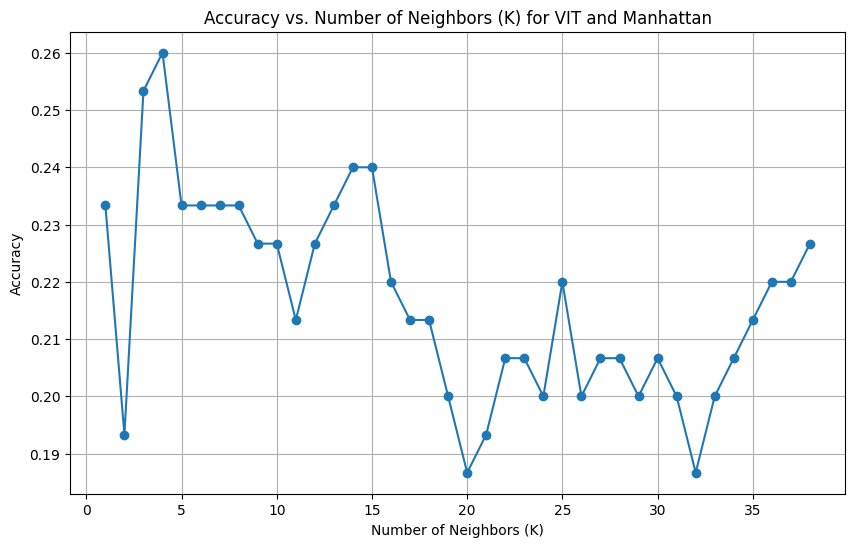

In [10]:
fixed_encoder = 'VIT'
fixed_distance_metric = 'Manhattan'

# Extract results for the fixed encoder and distance metric
filtered_results = [(k, accuracy) for encoder, dist, k, accuracy in results
                    if encoder == fixed_encoder and dist == fixed_distance_metric]

# Separate k and accuracy values
k_values, accuracy_values = zip(*filtered_results)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title(f'Accuracy vs. Number of Neighbors (K) for {fixed_encoder} and {fixed_distance_metric}')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

2.6.1 Tasks [30]
Tasks:
1. Is it possible to improve the execution time of the program? Hint: Use
Vectorization.
2. Plot inference time for initial KNN model, best KNN model, most optimized KNN model, and the default sklearn KNN model.
3. plot the inference time vs train dataset size for initial KNN model, best
KNN model, most optimized KNN model, and the default sklearn KNN
model

In [11]:
sklearn_time=time.time()
X = np.array([np.array(emb).flatten()for emb in dataset[:,1]])
y=np.array(dataset[:,3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with a specified number of neighbors (k)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the tray_trainining data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
sklearn_time=time.time()-sklearn_time


Accuracy: 0.15333333333333332


In [12]:
times=[]
methods=["Initial","Best","Optimised","Sklearn"]

In [13]:
# initial knn classifier
init_knn_time=time.time()
knn.set_encoder("VIT")
knn.set_k(5)
knn.set_distance_metric("Euclidean_unoptimised")
knn.predict_all()
init_knn_time=time.time()-init_knn_time
times.append(init_knn_time)

In [14]:
# best_knn_classifier
best_knn_time=time.time()
knn.set_encoder("VIT")
knn.set_k(14)
knn.set_distance_metric("Manhattan")
knn.predict_all()
best_knn_time=time.time()-best_knn_time
times.append(best_knn_time)

In [15]:
# optimised knn classifier
opt_knn_time=time.time()
knn.set_encoder("VIT")
knn.set_k(5)
knn.set_distance_metric("Euclidean")
knn.predict_all()
opt_knn_time=time.time()-opt_knn_time
times.append(opt_knn_time)
times.append(sklearn_time)

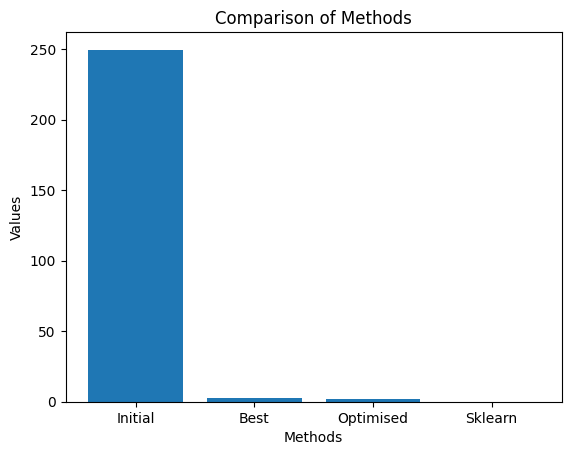

In [16]:
plt.bar(methods, times)
plt.xlabel('Methods')
plt.ylabel('Values')
plt.title('Comparison of Methods')
plt.show()

In [17]:
knn2=KNN(k=4,encoder="VIT",distance_metric="Manhattan")
knn2.set_encoder("VIT")
knn2.split()

In [18]:
times_list=[]
size_list=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
for size in range (5,41,5):
    times=[] 

    start=time.time()
    knn2.set_encoder("VIT")
    knn2.set_distance_metric("Euclidean_unoptimised")
    knn2.set_k(5)
    knn2.predict_all()
    end=time.time()
    times.append(end-start)

    start=time.time()
    knn2.set_encoder("VIT")
    knn2.set_distance_metric("Manhattan")
    knn2.set_k(14)
    knn2.predict_all()
    end=time.time()

    times.append(end-start)

    start=time.time()
    knn2.set_encoder("VIT")
    knn2.set_distance_metric("Euclidean")
    knn2.set_k(5)
    knn2.predict_all()
    end=time.time()

    times.append(end-start)

    sklearn_time=time.time()
    # X = np.array([np.array(emb).flatten()for emb in dataset[:,1]])
    # y=np.array(dataset[:,3])

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a KNN classifier with a specified number of neighbors (k)
    k = 3
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the tray_trainining data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)

    # Evaluate the accuracy of the model
    # accuracy = accuracy_score(y_test, y_pred)
    # print(f"Accuracy: {accuracy}")
    sklearn_time=time.time()-sklearn_time

    times_list.append(times)
    

KeyboardInterrupt: 

In [ ]:
# labels=["Initial","Best","Optimised","Sklearn"]

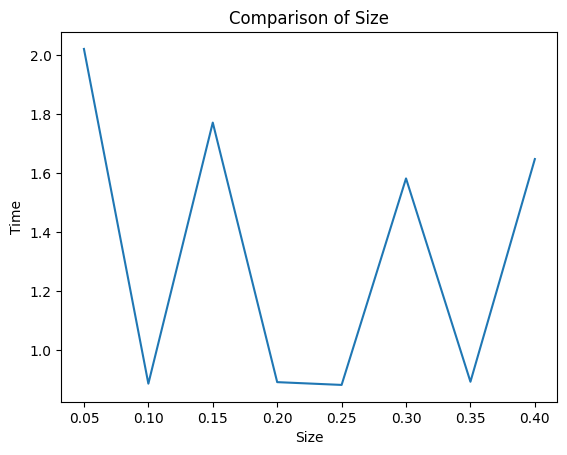

In [ ]:
# print(len(times_list))
# print(size_list)
methods=["Initial","Best","Optimised","Sklearn"]
# print(methods)
# print(times_list)
# print(size_list)
plt.plot(size_list, list(i[0] for i in times_list))
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Initial')
plt.show()

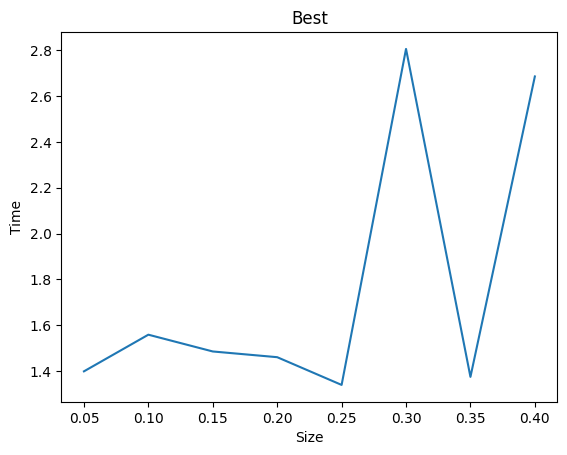

In [ ]:
plt.plot(size_list, list(i[1] for i in times_list))
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Best')
plt.show()

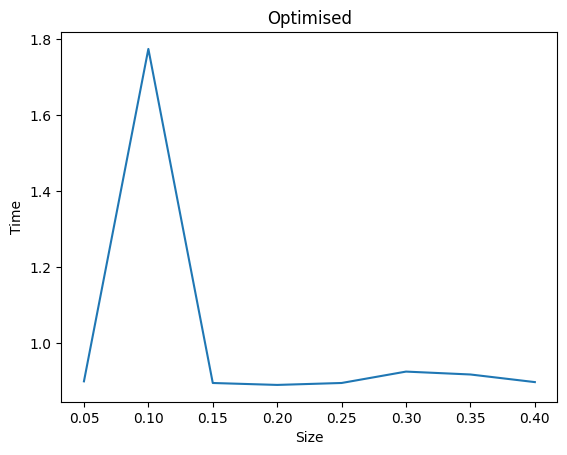

In [ ]:
plt.plot(size_list, list(i[2] for i in times_list))
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Optimised')
plt.show()

In [ ]:
plt.plot(size_list, list(i[3] for i in times_list))
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Sklearn')
plt.show()

IndexError: list index out of range

2.5.1 Tasks [10]
Tasks:
1. Create a bash script that when given data from a file in the form of a list
of test embeddings and test labels as a npy file exactly in the same format
as the dataset file given to you, return the same metrics as discussed in
task 2.2.1
Note:
1. The bash script should take the path to the file as an input.
2. It should print out in a table the accuracy, f1-score, recall, and precision.
3. Proper error handling should be present
4. There will be a penalty if this script does not work as expected.

In [19]:
from sklearn.tree import DecisionTreeClassifier
import csv

file=open("advertisement.csv","r")
csvr=csv.reader(file)

next(csvr)

categories=[]
for row in csvr:
    categories.append(row[-1])

cat=[]
for string in categories:
    # tokenise the string
    tokens = string.split(" ")
    for token in tokens:
        cat.append(token)
    

unique_categories=np.unique(cat,return_counts=True)
print(unique_categories)
# print(len(unique_categories))

file.close()

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

(array(['beauty', 'books', 'clothing', 'electronics', 'food', 'furniture',
       'home', 'sports'], dtype='<U11'), array([356, 355, 334, 332, 343, 336, 340, 362]))


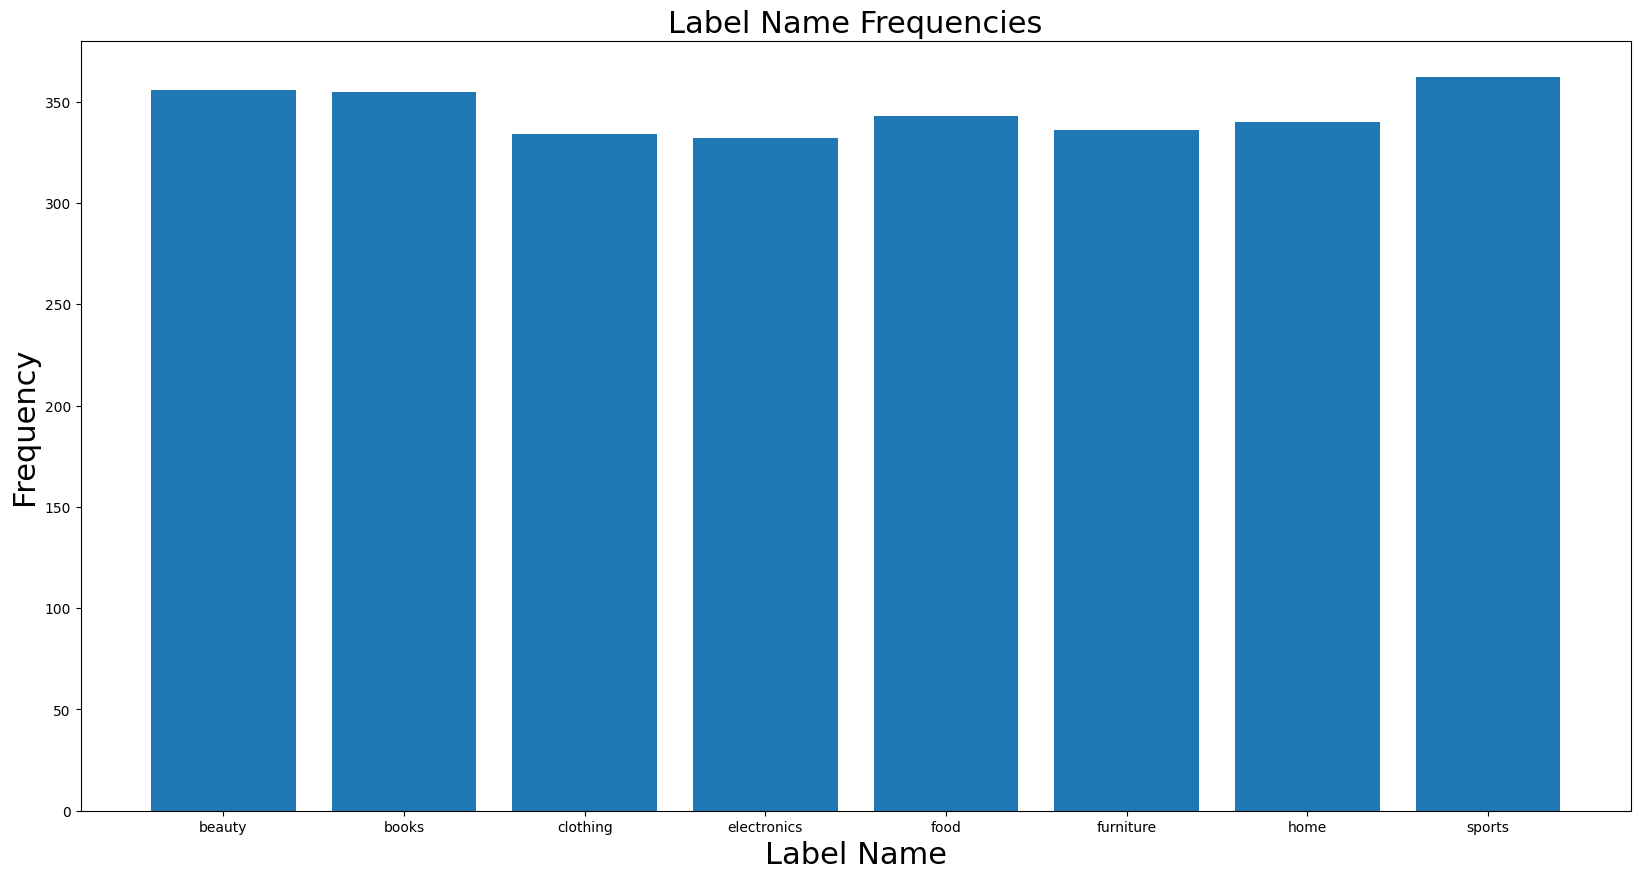

In [20]:
# Create a bar graph
plt.figure(figsize=(20,10))
plt.bar(unique_categories[0], unique_categories[1])
plt.xlabel('Label Name',fontsize=22)
plt.ylabel('Frequency',fontsize=22)
plt.title('Label Name Frequencies',fontsize=22)

# Display the graph
plt.show()

In [21]:
class Powerset_DT:
    def __init__(self,max_depth,max_features,criterion):
        self.max_depth=max_depth
        self.max_features=max_features
        self.criterion=criterion
    
    def set_max_depth(self,max_depth):
        self.max_depth=max_depth
    def set_max_features(self,max_features):
        self.max_features=max_features
    def set_criterion(self,criterion):
        self.criterion=criterion

    def power_set_calc(self,set):
        unique_cat=set
        # print(unique_cat)
        def powerset(s):
            n = len(s)
            for i in range(2 ** n):
                subset = [s[j] for j in range(n) if (i & (1 << j)) > 0]
                yield subset

        self.power_set = list(powerset(unique_cat))

        # for subset in power_set:
        #     print(subset)

        # print(len(power_set))

    def compare(self,list1, list2):
        return len(set(list1) & set(list2)) == len(list1)
    
    
    def assign_index(self,subset):
        index=[]
        for i in range(len(subset)):
            for j in range(len(self.power_set)):
                if(self.compare(subset[i].split(" "),self.power_set[j])):
                    index.append(j)
                    # print(subset[i].split(" "),power_set[j])
                    break
        return index
    
    
    def fit(self):
        df = pd.read_csv('advertisement.csv')
        features=['gender','education','city','married','children','occupation','most bought item']
        df=pd.get_dummies(df,columns=features,drop_first=True)
        self.X = df.drop('labels', axis=1)
        self.y = self.assign_index(df['labels'])

    def k_fold_predict(self):
        # Shuffle the data randomly
        # random_indices = np.random.permutation(len(self.X))
        # X_shuffled = self.X[random_indices]
        # y_shuffled = self.y[random_indices]
        
        # Number of splits (parts)
        num_splits = 10
        kf=KFold(n_splits=num_splits)

        # Initialize lists to store accuracy scores
        accuracy_scores = []

        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X.iloc[train_index,:], self.X.iloc[test_index,:]
            y_train, y_test = [self.y[val] for val in train_index], [self.y[val] for val in test_index]
            # Create a Decision Tree Classifier
            clf = DecisionTreeClassifier(max_depth=self.max_depth,max_features=self.max_features,criterion=self.criterion)
            
            # Train the classifier on the training data
            clf.fit(X_train, y_train)
            
            # Make predictions on the test data
            y_pred = clf.predict(X_test)
            
            # Calculate accuracy and store it
            accuracy = accuracy_score(y_test, y_pred)
            f1_macro=f1_score(y_test, y_pred, average='macro')
            accuracy_scores.append(accuracy)

        # Calculate the average accuracy
        average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
        print("K Fold Average Accuracy:", average_accuracy)
        
    def predict(self):
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.1, random_state=42)

        # Create a Decision Tree Classifier
        clf = DecisionTreeClassifier()

        # Train the classifier on the training data
        clf.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        f1_micro = f1_score(y_test, y_pred, average='micro')
        f1_macro=f1_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='micro',zero_division=1)
        recall = recall_score(y_test, y_pred, average='micro',zero_division=1)

        # print("Accuracy:", accuracy)
        self.accuracy=accuracy
        self.f1_micro=f1_micro
        self.f1_macro=f1_macro
        self.precision=precision
        self.recall=recall
        self.cm=confusion_matrix(y_test, y_pred)

In [22]:
powerset_dt=Powerset_DT(max_depth=5,max_features=5,criterion="gini")
powerset_dt.power_set_calc(unique_categories[0])
powerset_dt.fit()
powerset_dt.predict()
print("Accuracy ",powerset_dt.accuracy)
print("F1-micro ",powerset_dt.f1_micro)
print("F1-macro ",powerset_dt.f1_macro)
print("Precision ",powerset_dt.precision)
print("Recall ",powerset_dt.recall)
print("Confusion Matrix ",powerset_dt.cm)


Accuracy  0.06
F1-micro  0.06
F1-macro  0.016513761467889906
Precision  0.06
Recall  0.06
Confusion Matrix  [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
class MultiOutput_DT:
    def __init__(self,max_depth,max_features,criterion):
        self.max_depth=max_depth
        self.max_features=max_features
        self.criterion=criterion
    
    def set_max_depth(self,max_depth):
        self.max_depth=max_depth
    def set_max_features(self,max_features):
        self.max_features=max_features
    def set_criterion(self,criterion):
        self.criterion=criterion
    
    def assign_categories(self,categories):
        self.categories=categories

    def create_binary_encoding(self, label_string):
        unique_categories=self.categories
        # Tokenize the label string by removing whitespaces and converting to lowercase
        tokenized_label = label_string.strip(" ").lower()
        
        # Create a list to store the binary encodings in the same order as unique_categories
        encoding_list = []
        
        # Iterate through unique categories and create binary encoding
        for category in unique_categories:
            # Create a binary encoding where 1 represents presence and 0 represents absence
            encoding = 1 if category in tokenized_label else 0
            encoding_list.append(encoding)
        
        return encoding_list

    def compare(list1, list2):
        return len(set(list1) & set(list2)) == len(list1)
    
    def assign_tuple(self,subset):
        index=[]
        for lbl in subset:
            index.append(self.create_binary_encoding(lbl))
        return index
    
    def k_fold_predict(self):
        num_splits = 5
        kf=KFold(n_splits=num_splits)

        # Initialize lists to store accuracy scores
        
        for i in range(len(self.categories)):
            accuracy_scores = []
            # column_elements = [sublist[i] for sublist in self.y]
            y=[i[0] for i in self.y]
        # print(y)
        
        # y.reshape(-1)

            for train_index, test_index in kf.split(self.X):
                # print(train_index)
                X_train, X_test = self.X.iloc[train_index,:], self.X.iloc[test_index,:]
                y_train, y_test = [y[i] for i in train_index], [y[i] for i in test_index]
                # Create a Decision Tree Classifier
                clf = DecisionTreeClassifier(max_depth=self.max_depth,max_features=self.max_features,criterion=self.criterion)
                
                # Train the classifier on the training data
                clf.fit(X_train, y_train)
                
                # Make predictions on the test data
                y_pred = clf.predict(X_test)
                
                # Calculate accuracy and store it
                accuracy = accuracy_score(y_test, y_pred)
                f1_macro=f1_score(y_test, y_pred, average='macro')
                accuracy_scores.append(accuracy)

        # Calculate the average accuracy
        average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
        print("K Fold Average Accuracy:", average_accuracy)
    
    def fit(self):
        df = pd.read_csv('advertisement.csv')
        features=['gender','education','city','married','children','occupation','most bought item']
        df=pd.get_dummies(df,columns=features,drop_first=True)
        self.X = df.drop('labels', axis=1)
        self.y = self.assign_tuple(df['labels'])
        # print(self.y)
        # print(df['labels'])

    def predict(self,y):
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(self.X, y, test_size=0.1, random_state=42)

        # Create a Decision Tree Classifier
        clf = DecisionTreeClassifier(criterion=self.criterion,max_depth=self.max_depth,max_features=self.max_features)

        # Train the classifier on the training data
        clf.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        self.f1_micro = f1_score(y_test, y_pred, average='micro')
        self.f1_macro = f1_score(y_test, y_pred, average='macro')
        self.precision=precision_score(y_test, y_pred, average='micro',zero_division=1)
        self.recall=recall_score(y_test, y_pred, average='micro',zero_division=1)
        # print("Accuracy:", accuracy)
        return accuracy

    def decision_per_label(self):
        acc=[]
        f1_micro=0
        f1_macro=0
        precision=0
        recall=0
        for i in range(len(self.categories)):
            column_elements = [sublist[i] for sublist in self.y]
            # print(len(column_elements))
            acc.append(self.predict(column_elements))
            f1_micro+=self.f1_micro
            f1_macro+=self.f1_macro
            precision+=self.precision
            recall+=self.recall
        f1_micro=f1_micro/len(self.categories)
        f1_macro=f1_macro/len(self.categories)
        precision=precision/len(self.categories)
        recall=recall/len(self.categories)
        # print(len(acc))
        # print(len(self.categories))
        self.f1_macro=f1_macro
        self.f1_micro=f1_micro
        self.avg_accuracy=sum(acc)/len(acc)
        self.precision=precision
        self.recall=recall
        

In [24]:
multioutput_dt=MultiOutput_DT(max_depth=5,max_features=6,criterion="gini")
multioutput_dt.assign_categories(unique_categories[0])
multioutput_dt.fit()
multioutput_dt.decision_per_label()
print("Accuracy: ",multioutput_dt.avg_accuracy)
print("F1 Micro: ",multioutput_dt.f1_micro)
print("F1 Macro: ",multioutput_dt.f1_macro)
print("Precision: ",multioutput_dt.precision)
print("Recall: ",multioutput_dt.recall)

Accuracy:  0.66875
F1 Micro:  0.66875
F1 Macro:  0.40755124332912906
Precision:  0.66875
Recall:  0.66875


In [25]:
criterion_list = ["gini", "entropy"]
max_depth_list = [3,5,10,20,30]
max_features_list = [3,5,7,9,11]

In [26]:
powerset_results = {}
for criteria in criterion_list:
    for depth in max_depth_list:
        for features in max_features_list:
            powerset_dt.set_criterion(criteria)
            powerset_dt.set_max_depth(depth)
            powerset_dt.set_max_features(features)
            # powerset_dt.fit()
            powerset_dt.predict()
            powerset_results[(criteria, depth, features)] =powerset_dt.f1_macro
            print("Accuracy: ",powerset_dt.accuracy,",F1-micro: ",powerset_dt.f1_micro,"F1-macro: ",powerset_dt.f1_macro,"Precision: ",powerset_dt.precision,"Recall: ",powerset_dt.recall," " ,criteria," ",depth," ",features)
            print("Confusion Matrix ",powerset_dt.cm)

Accuracy:  0.07 ,F1-micro:  0.07 F1-macro:  0.02519047619047619 Precision:  0.07 Recall:  0.07   gini   3   3
Confusion Matrix  [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Accuracy:  0.05 ,F1-micro:  0.05000000000000001 F1-macro:  0.013333333333333332 Precision:  0.05 Recall:  0.05   gini   3   5
Confusion Matrix  [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy:  0.05 ,F1-micro:  0.05000000000000001 F1-macro:  0.01424242424242424 Precision:  0.05 Recall:  0.05   gini   3   7
Confusion Matrix  [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy:  0.04 ,F1-micro:  0.04 F1-macro:  0.0110062893081761 Precision:  0.04 Recall:  0.04   gini   3   9
Confusion Matrix  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0

In [27]:
multioutput_results = {}
for criteria in criterion_list:
    for depth in max_depth_list:
        for features in max_features_list:
            multioutput_dt.set_criterion(criteria)
            multioutput_dt.set_max_depth(depth)
            multioutput_dt.set_max_features(features)
            multioutput_results[(criteria, depth, features)] = multioutput_dt.avg_accuracy
            # multioutput_dt.fit()
            multioutput_dt.decision_per_label()
            print("Accuracy: ",multioutput_dt.avg_accuracy,",F1-micro: ",multioutput_dt.f1_micro,"F1-macro: ",multioutput_dt.f1_macro,"Precision: ",multioutput_dt.precision,"Recall: ",multioutput_dt.recall," " ,criteria," ",depth," ",features)

Accuracy:  0.66625 ,F1-micro:  0.66625 F1-macro:  0.3995887209707881 Precision:  0.66625 Recall:  0.66625   gini   3   3
Accuracy:  0.66625 ,F1-micro:  0.66625 F1-macro:  0.3995887209707881 Precision:  0.66625 Recall:  0.66625   gini   3   5
Accuracy:  0.6649999999999999 ,F1-micro:  0.6649999999999999 F1-macro:  0.3991536356940739 Precision:  0.6649999999999999 Recall:  0.6649999999999999   gini   3   7
Accuracy:  0.665 ,F1-micro:  0.665 F1-macro:  0.4165606800837833 Precision:  0.665 Recall:  0.665   gini   3   9
Accuracy:  0.67625 ,F1-micro:  0.67625 F1-macro:  0.42939223168176155 Precision:  0.67625 Recall:  0.67625   gini   3   11
Accuracy:  0.6699999999999999 ,F1-micro:  0.6699999999999999 F1-macro:  0.4112229201049873 Precision:  0.6699999999999999 Recall:  0.6699999999999999   gini   5   3
Accuracy:  0.665 ,F1-micro:  0.665 F1-macro:  0.3991378155527086 Precision:  0.665 Recall:  0.665   gini   5   5
Accuracy:  0.66625 ,F1-micro:  0.66625 F1-macro:  0.3995887209707881 Precision:

In [28]:
k_folds=5

In [29]:
# Sort the F1 macro scores in descending order
sorted_scores = sorted(powerset_results.items(), key=lambda x: x[1], reverse=True)

# Print the top 3 performing hyperparameter sets based on F1 macro score
print("Top 3 Performing Hyperparameter Sets (Based on F1 Macro Score):")
for idx, (hyperparameters, f1_macro) in enumerate(sorted_scores[:3], start=1):
    
    criteria, depth, features = hyperparameters
    print(f"{idx}. Criteria: {criteria}, Max Depth: {depth}, Max Features: {features}, F1 Macro: {f1_macro:.4f}")
    powerset_dt.set_criterion(criteria)
    powerset_dt.set_max_depth(depth)
    powerset_dt.set_max_features(features)
    powerset_dt.k_fold_predict()

Top 3 Performing Hyperparameter Sets (Based on F1 Macro Score):
1. Criteria: entropy, Max Depth: 3, Max Features: 9, F1 Macro: 0.0296
K Fold Average Accuracy: 0.016
2. Criteria: gini, Max Depth: 10, Max Features: 5, F1 Macro: 0.0276
K Fold Average Accuracy: 0.026000000000000002
3. Criteria: entropy, Max Depth: 10, Max Features: 11, F1 Macro: 0.0260
K Fold Average Accuracy: 0.016


In [30]:
# Sort the F1 macro scores in descending order
sorted_scores = sorted(multioutput_results.items(), key=lambda x: x[1], reverse=True)

# Print the top 3 performing hyperparameter sets based on F1 macro score
print("Top 3 Performing Hyperparameter Sets (Based on F1 Macro Score):")
for idx, (hyperparameters, f1_macro) in enumerate(sorted_scores[:3], start=1):
    criteria, depth, features = hyperparameters
    print(f"{idx}. Criteria: {criteria}, Max Depth: {depth}, Max Features: {features}, F1 Macro: {f1_macro:.4f}")
    multioutput_dt.set_criterion(criteria)
    multioutput_dt.set_max_depth(depth)
    multioutput_dt.set_max_features(features)
    multioutput_dt.k_fold_predict()

Top 3 Performing Hyperparameter Sets (Based on F1 Macro Score):
1. Criteria: gini, Max Depth: 20, Max Features: 9, F1 Macro: 0.7050
K Fold Average Accuracy: 0.642
2. Criteria: entropy, Max Depth: 30, Max Features: 11, F1 Macro: 0.6937
K Fold Average Accuracy: 0.65
3. Criteria: gini, Max Depth: 20, Max Features: 3, F1 Macro: 0.6887
K Fold Average Accuracy: 0.6559999999999999
